In [44]:
from google.colab import drive
drive.mount('/content/Drive')
file_path = '/content/Drive/MyDrive/YourFolder/SalesData.csv' # Replace it with your path

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [66]:
import pandas as pd

df = pd.read_csv(file_path)
df.head(2)

,Transaction_ID,Date,Product_ID,Category,Quantity,Sale_Price,Payment_Method,Marketing_Channel
0,6390,01/01/2021,13,Home,3,80.17,Credit Card,Google Ad
1,5426,01/01/2021,3,Home,3,87.96,Bank Transfer,Instagram


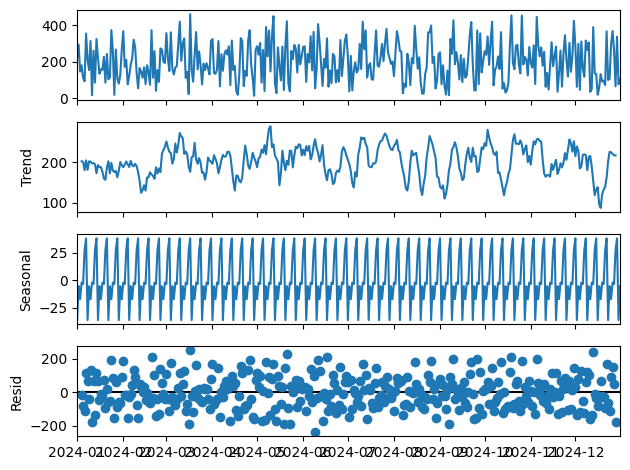

In [62]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd


df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby('Date').sum().reset_index()
df = df[['Date', 'Sale_Price']]
ts = df.set_index('Date')
ts = ts.asfreq('d')

ts = ts.loc['2024-01-01':'2024-12-31']
seasonal_decompose(ts).plot();

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Mean Squared Error: 24165.264015549074
Mean Absolute Error: 122.86095953981868


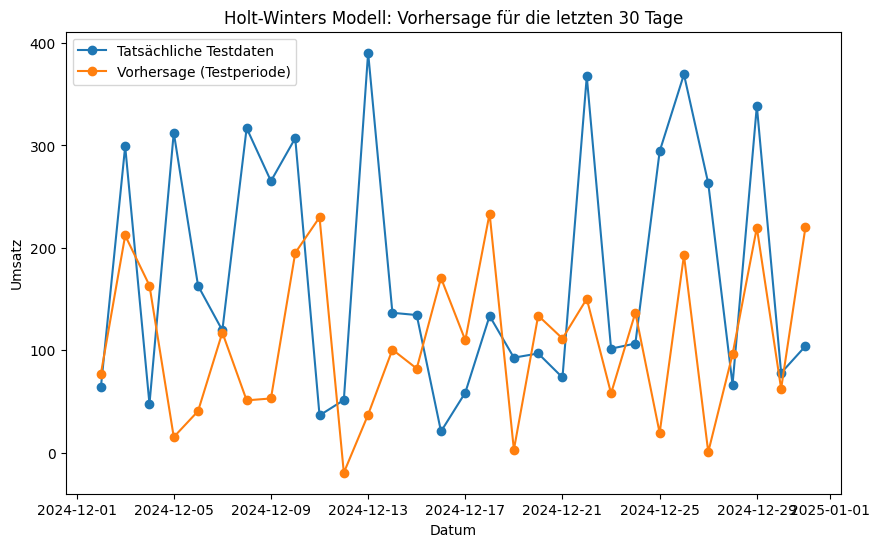

In [78]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


df = pd.read_csv(file_path)  # your path
df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby('Date').sum().reset_index()
df.set_index('Date', inplace=True)

ts = df['Sale_Price']
ts = ts.asfreq('D')

train_ts = ts[:-30]
test_ts = ts[-30:]

model = ExponentialSmoothing(train_ts, seasonal='add', trend='mul', seasonal_periods=365)
fit = model.fit()

test_forecast = fit.forecast(30)

mse = mean_squared_error(test_ts, test_forecast)
mae = mean_absolute_error(test_ts, test_forecast)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

plt.figure(figsize=(10, 6))
plt.plot(test_ts, label='Tatsächliche Testdaten', marker='o')
plt.plot(test_forecast, label='Vorhersage (Testperiode)', marker='o')
plt.legend()
plt.title('Holt-Winters Modell: Vorhersage für die letzten 30 Tage')
plt.xlabel('Datum')
plt.ylabel('Umsatz')
plt.show()


In [94]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing


df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby('Date').sum().reset_index()
df.set_index('Date', inplace=True)

ts = df['Sale_Price']
ts = ts.asfreq('D')

model = ExponentialSmoothing(ts, seasonal='mul', trend='mul', seasonal_periods=365)
fit = model.fit()

forecast_120_days = fit.forecast(120)

forecast_df = forecast_120_days.reset_index()
forecast_df.columns = ['Date', 'Forecast']
forecast_df['Day_Count'] = range(1, 121)
forecast_df['Best_Case'] = (forecast_df['Forecast'] * 1.1).round(2)
forecast_df['Worst_Case'] = (forecast_df['Forecast'] * 0.9).round(2)
forecast_df['Forecast'] = forecast_df['Forecast'].round(2)

forecast_df.to_csv('/content/Drive/MyDrive/yourpath.csv', index=False, sep=';', decimal=',') # replace it with your path

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [95]:
forecast_df

,Date,Forecast,Day_Count,Best_Case,Worst_Case
0,2025-01-01,210.64,1,231.70,189.58
1,2025-01-02,218.07,2,239.88,196.26
2,2025-01-03,220.28,3,242.31,198.25
3,2025-01-04,130.91,4,144.00,117.82
4,2025-01-05,148.18,5,163.00,133.36
...,...,...,...,...,...
115,2025-04-26,184.81,116,203.29,166.33
116,2025-04-27,184.73,117,203.20,166.26
117,2025-04-28,172.63,118,189.90,155.37
118,2025-04-29,236.02,119,259.62,212.41
